In [61]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.linear_model import SGDClassifier

EPOCH = 100
LR = 0.1

# ~ PoC AI Pool 2024 ~
- ## Day 2: Neural Networks from Scratch
    - ### Module 2: Logistic Regression
-----------

Congratulations on building your first machine learning algorithm ! You were probably getting really impatient of diving into AI. I hope you understand why we wanted to take the time to go through all the basics first, though, because as you could probably tell, our python and numpy skills are going to prove really useful when building machine learning models.

During the first module of the day, you got the gist of the main aspects of a machine learning pipeline:
- making a prediction
- computing the loss
- computing the gradients
- updating the weight and bias

You'll find that this basic architecture is behind almost everything we'll be doing for the rest of the week.

You will also find that this basic architecture could be recycled so that the developer can focus entirely on the things that do change.

For example, here's an example of how **Linear Regression** can be achieved using the most popular ML library, **pytorch**:

```python
class LinearRegression(nn.Module):
    def __init__(self):
        self.fc = nn.Linear(***,***)
    def forward(self, x):
        return self.fc(x)
```

And actually, here's the same for **Logistic Regression**, which is what we'll be implementing by hand in this module !

```python
class LogisticRegression(nn.Module):
    def __init__(self):
        self.fc = nn.Linear(***,***)
    def forward(self, x):
        x = self.fc
        return F.sigmoid(x)
```

Cool right ? Well, it might look great for Linear Regression, since you already know what's going on behind the scenes...\
But unless you already know how Logistic Regression works, the code sample won't tell you anything !

That's why we're taking the time to learn the (boring?) math behind these algorithms. It might be annoying at first, but I can assure you that understanding why we use Linear instead of Logistic Regression for certain tasks is much more intuitive if you know how they work than if you have no idea.

First of all, we're going to be using an actual ML library before we begin !

The library is called sklearn and it is a wonderful set of tools which can help while working on AI !

In fact, sklearn has implementations of many algorithms, including Linear and Logistic Regression !

It also provides us with plenty of tools to quickly generate and manipulate randomized data for training :

In [ ]:
## Using `make_blobs()`, we generate a sample dataset with 1_000 entries, each with two features.
## With the `centers` parameter, we tell sklearn to separate the data in two main classes
## Logistic Regression being a classifier model, we will use it to predict if one data entry
## belongs to one class or the other !
x_train, y_train = sklearn.datasets.make_blobs(n_samples=1_000, n_features=2, centers=2)

## This data doesn't mean anything, like Brad's problem in the last module, but if you're wondering
## how multiple features would translate into a real world problem, imagine if you had data of
## house prices and their size, and you needed to predict whether Brad would be willing to buy the
## house or not. That would mean each data entry would have two features: the price and size of the
## house. The "x" would be an array of [price, size] and "y" would be a binary value (either true or false).
x_train.shape, y_train.shape

We'll use matplotlib to display our data in a nice way :

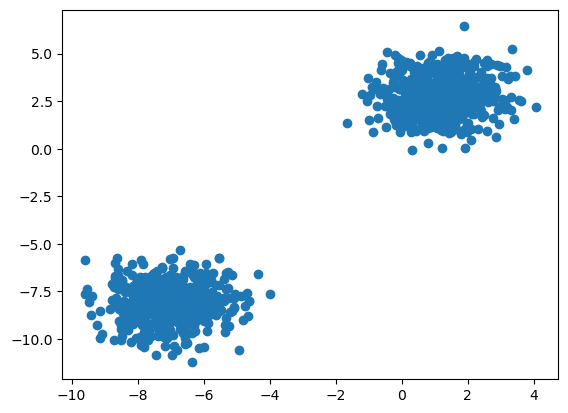

In [63]:
plt.scatter(x_train[:,0], x_train[:,1])
plt.show()

Each entry is represented by a blue circle, and you can clearly see that there are two clearly separate groups of data.

Now, we'll use sklearn's `SGDClassifier` to train a logistic regression on our generated data.

If you're curious, you might stumble upon `LogisticRegression` while browsing through [sklearn's docs](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning), which is also a sklearn model which implements the eponymous algorithm.

The reason we use `SGDClassifier` instead is because it adds the notion of gradient descent and updating weights to the basic Logistic Regression algorithm.

>SGD stands for 'stochastic gradient descent' btw

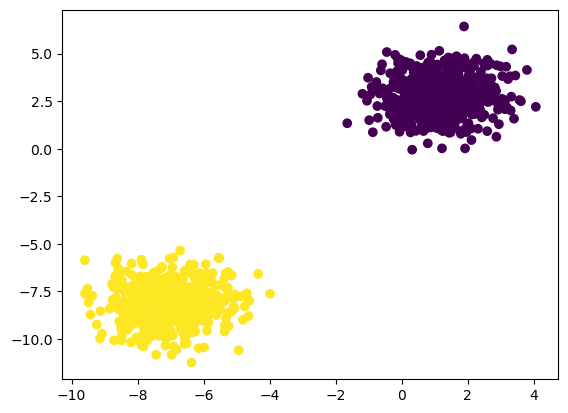

100.0% accuracy


In [64]:
mdl = SGDClassifier(eta0=LR, max_iter=EPOCH)
mdl.fit(x_train, y_train)

plt.scatter(x_train[:,0], x_train[:,1], c=mdl.predict(x_train))
plt.show()
print(f"{(mdl.predict(x_train) == y_train).mean()*100}% accuracy")

In [65]:
class MyLogisticRegression:
    def __init__(self, max_iter=EPOCH, lr=LR):
        self.epochs = max_iter
        self.lr = lr

    def fit(self, x: np.ndarray, y: np.ndarray):
        self.w = np.zeros(x.shape[1])
        self.b = 0

        for i in range(self.epochs):
            y_pred = self.forward(x)
            loss = self.bce(y_pred, y)
            dw, db = self.backward(x, y)
            self.optimize(dw, db)

    def optimize(self, dw: np.ndarray, db: np.ndarray):
        self.w -= dw * self.lr
        self.b -= db * self.lr

    def backward(self, x: np.ndarray, y: np.ndarray):
        y_pred = self.forward(x)
        db = np.mean(y_pred - y)
        dw = np.array([np.mean(grad) for grad in x.T @ (y_pred - y)])
        return dw, db

    def bce(self, y_pred: np.ndarray, y: np.ndarray):
        return -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))

    def forward(self, x: np.ndarray):
        y_pred = self.linear(x)
        return np.array([self.sigmoid(val) for val in y_pred])

    def linear(self, x: np.ndarray):
        return self.w @ x.T + self.b

    def sigmoid(self, x: np.ndarray):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)

    def predict(self, x):
        y_pred = self.forward(x)
        return np.array([1 if p > 0.5 else 0 for p in y_pred])

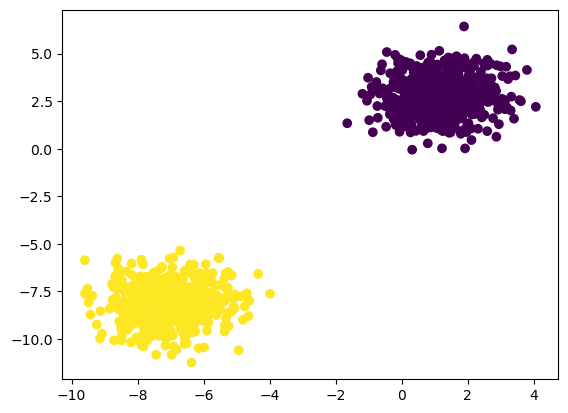

100.0% accuracy


In [66]:
mdl = MyLogisticRegression()
mdl.fit(x_train, y_train)

plt.scatter(x_train[:,0], x_train[:,1], c=mdl.predict(x_train))
plt.show()

print(f"{(mdl.predict(x_train) == y_train).mean()*100}% accuracy")